## This is an assessment of the availability, contribution history, completeness, and currentness of OSM data for industrial sites in the Arctic region using Ohsome API and Ohsome Quality Analyst

Our study focused on the regions defined by the presence of either discontinuous or continuous permafrost in five Arctic countries: Canada, USA, Greenland, Russia, and Norway

In [30]:
import json
import folium

# Read the GeoJSON file containing the bounding polygon

with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    data_ors = json.load(geojson_file)
# Create a Folium map with Leaflet
m = folium.Map(location=[34.81495, 95.3988,], zoom_start=1)

# Add GeoJSON data using Folium
folium.GeoJson(data_ors).add_to(m)
folium.LayerControl().add_to(m)
# Display the map
#m.save('mapors.html')
m

# Count of all industrial related features 
Using the Ohsome `element` aggregation endpoint to count all industrial-related objects in the OSM database as of `2023-09-20` and grouping them by countries.

# Count of all features with tags  `"landuse=industrial or building=industrial or industrial=* or man_made=works or landuse=quarry or man_made=storage_tank or man_made=flare"`

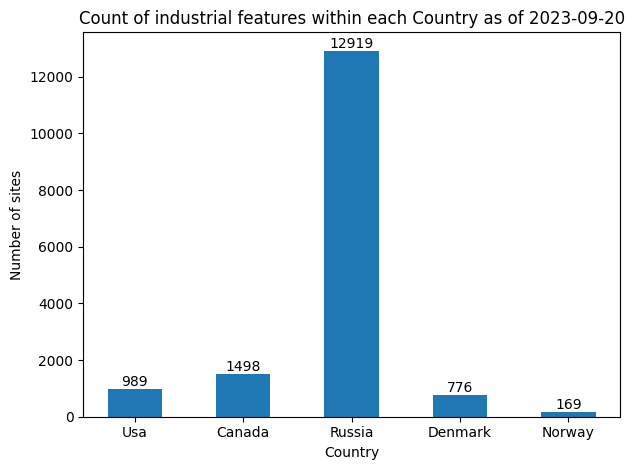

In [46]:
import requests
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import numpy as np

filter = "landuse=industrial or building=industrial or industrial=* or man_made=works or landuse=quarry or man_made=storage_tank or man_made=flare", # tags used
URL = 'https://api.ohsome.org/v1/elements/count/groupBy/boundary'

# Read the GeoJSON file containing the bounding polygon
with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    bounding_polygon_geojson = json.load(geojson_file)



# Define the request parameters and make the post request
data = {
"bpolys": json.dumps(bounding_polygon_geojson),  # Convert GeoJSON to JSON string
"time": "2023-09-20",
"filter": filter, #
"format": "json"
 }

response = requests.post(URL, data=data)
results = response.json()
#print(results)

# Extract data for plotting
group_objects = [item['groupByObject'] for item in results['groupByResult']] # Countries
values = [item['result'][0]['value'] for item in results['groupByResult']] # Values(count of industrial objects per country) 

# Create a bar chart using Matplotlib
fig, ax = plt.subplots()
bar_width = 0.5

# Bar positions
bar_positions = np.arange(len(group_objects))

# Create bars
bars = ax.bar(bar_positions, values, bar_width)

# Customize the layout
ax.set_title('Count of industrial features within each Country as of 2023-09-20')
ax.set_xlabel('Country')
ax.set_ylabel('Number of sites')
ax.set_xticks(bar_positions)
ax.set_xticklabels(group_objects)
#ax.legend()

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.savefig('sites_plot.png', bbox_inches='tight')
plt.show()

## Plot of Industrial Objects Distribution and Density Across Countries

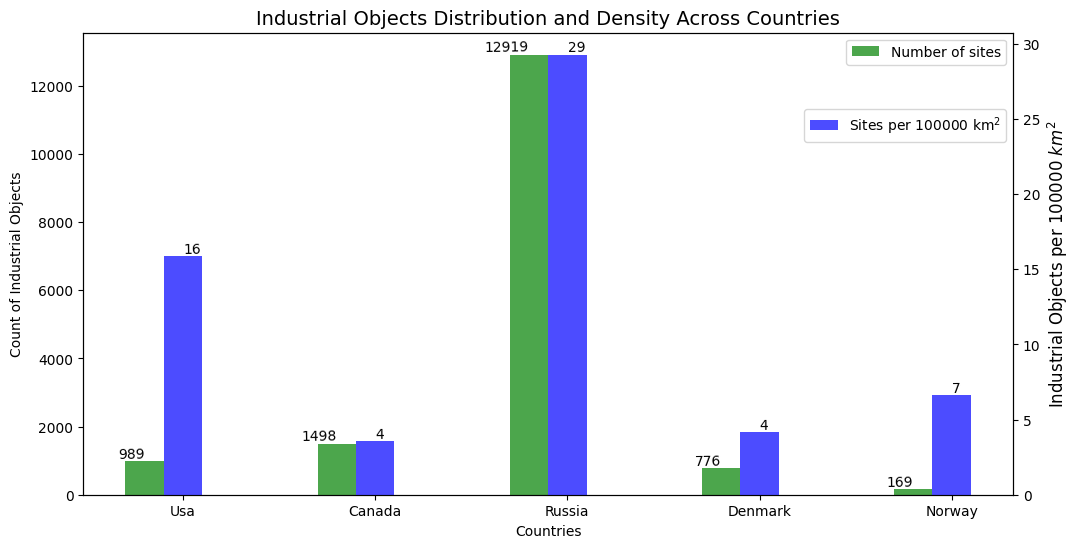

In [35]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

gdf = gpd.read_file('data/boundary_cont_discon.geojson')
gdf = gdf.to_crs('EPSG:3395') #using projected cordinates for better area estimate
gdf['area'] = gdf.geometry.area/1000000 # area in square meters
sites = [989, 1498, 12919, 776, 169]
gdf['sites'] = sites
gdf['sites_density'] = gdf['sites']/gdf['area']
gdf.head()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plots for densities
bar_width = 0.2
bar_positions = np.arange(len(gdf['id']))

bars = ax1.bar(bar_positions - bar_width, gdf['sites'], width=bar_width, label='Number of sites', color='g', alpha=0.7)

# Adding labels to the bars
for bar, value in zip(bars, gdf['sites']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{value}', ha='right', va='bottom', rotation=1)

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(gdf['id'])
ax1.set_xlabel('Countries')
ax1.set_ylabel('Count of Industrial Objects')  
ax1.legend(loc='best', bbox_to_anchor=(1, 1))

# Create a second y-axis for the bar plot of site counts
ax2 = ax1.twinx()
bars2 = ax2.bar(bar_positions, gdf['sites_density'] * 100000, width=bar_width, label='Sites per 100000 km$^2$', color='b', alpha=0.7)

# Adding labels to the bars
for bar, value in zip(bars2, gdf['sites_density']):
    height1 = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height1, f'{value * 100000:.0f}', ha='left', va='bottom', rotation=1)
ax2.set_ylabel('Industrial Objects per 100000 $km^2$', fontsize=12)
ax2.legend(loc='best', bbox_to_anchor=(1, 0.85))

# Show the plot
plt.title('Industrial Objects Distribution and Density Across Countries', fontsize=14)
plt.savefig('plots/site_statistics_plot.png', bbox_inches='tight')
plt.show()

#gdf.head()
 

# Count of objects with the individual tags grouped by the countries as of 2023-09-20

 ## `man_made=works`

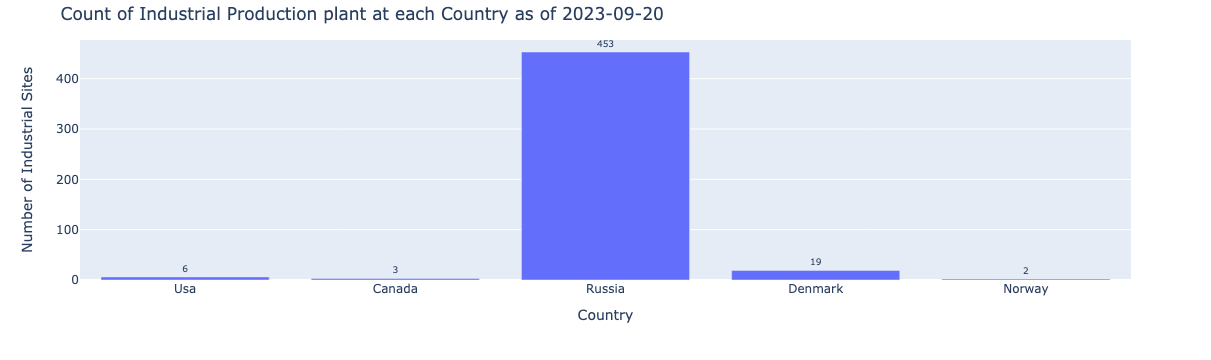

In [47]:
import requests
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import plotly.express as px
URL = 'https://api.ohsome.org/v1/elements/count/groupBy/boundary'

# Read the GeoJSON file containing the bounding polygon
with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    bounding_polygon_geojson = json.load(geojson_file)



# Define the request parameters and make the post request
data = {
"bpolys": json.dumps(bounding_polygon_geojson),  # Convert GeoJSON to JSON string
"time": "2023-09-20",
"filter": "man_made=works",
"format": "json"
 }

response = requests.post(URL, data=data)
results = response.json()
#print(results)

# Extract data for plotting
group_objects = [item['groupByObject'] for item in results['groupByResult']]
values = [item['result'][0]['value'] for item in results['groupByResult']]



# Create a bar chart using Plotly
fig = px.bar(x=group_objects, y=values, labels={'x': 'Group Object', 'y': 'Value'}, text=values)
fig.update_layout(
    title='Count of Industrial Production plant at each Country as of 2023-09-20',
    xaxis_title='Country',
    yaxis_title='Number of Industrial Sites'
)
# Customize the text placement
fig.update_traces(texttemplate='%{text}',textfont=dict(size=9), textposition='outside')
fig.update_layout(margin=dict(t=40))
fig.show()

# `landuse=industrial`

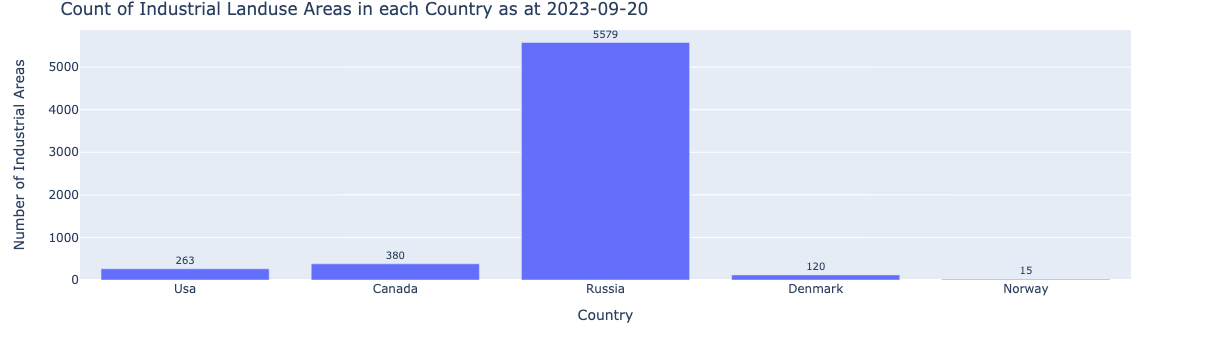

In [45]:
import requests
import geopandas as gpd
import json
import matplotlib.pyplot as plt

URL = 'https://api.ohsome.org/v1/elements/count/groupBy/boundary'

# Read the GeoJSON file containing the bounding polygon
with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    bounding_polygon_geojson = json.load(geojson_file)



# Define the request parameters and make the post request
data = {
"bpolys": json.dumps(bounding_polygon_geojson),  # Convert GeoJSON to JSON string
"time": "2023-09-20",
"filter": "landuse=industrial",
"format": "json"
 }

response = requests.post(URL, data=data)
results = response.json()
#print(results)
import plotly.express as px

group_objects = [item['groupByObject'] for item in results['groupByResult']]
values = [item['result'][0]['value'] for item in results['groupByResult']]

# Create a bar chart using Plotly
fig = px.bar(x=group_objects, y=values, labels={'x': 'Group Object', 'y': 'Value'}, text=values)
fig.update_layout(
    title='Count of Industrial Landuse Areas in each Country as at 2023-09-20',
    xaxis_title='Country',
    yaxis_title='Number of Industrial Areas'
)

# Customize the text placement
# Customize the text placement
fig.update_traces(texttemplate='%{text}',textfont=dict(size=10), textposition='outside')
fig.update_layout(margin=dict(t=30))
fig.show()

#  `building=industrial` 

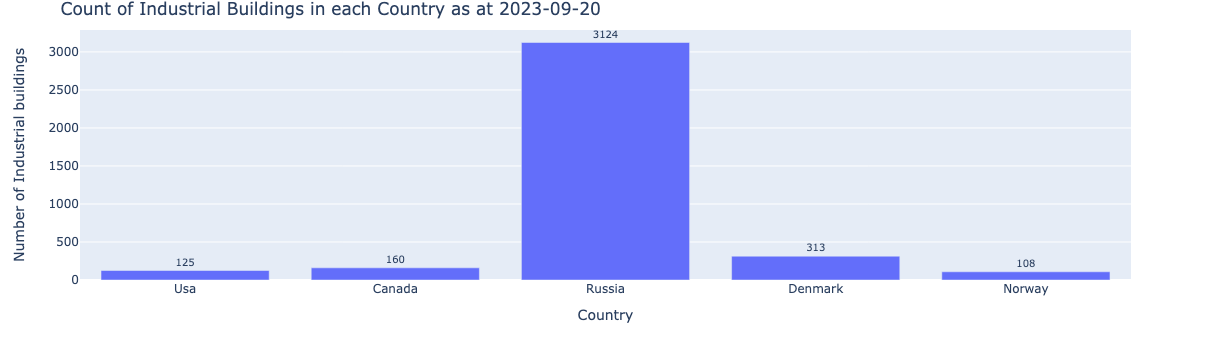

In [61]:
import requests
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import plotly.express as px

URL = 'https://api.ohsome.org/v1/elements/count/groupBy/boundary'

# Read the GeoJSON file containing the bounding polygon
with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    bounding_polygon_geojson = json.load(geojson_file)



# Define the request parameters and make the post request
data = {
"bpolys": json.dumps(bounding_polygon_geojson),  # Convert GeoJSON to JSON string
"time": "2023-09-20",
"filter": "building=industrial",
"format": "json"
 }

response = requests.post(URL, data=data)
results = response.json()
#print(results)


group_objects = [item['groupByObject'] for item in results['groupByResult']]
values = [item['result'][0]['value'] for item in results['groupByResult']]

# Create a bar chart using Plotly
fig = px.bar(x=group_objects, y=values, labels={'x': 'Group Object', 'y': 'Value'}, text=values)
fig.update_layout(
    title='Count of Industrial Buildings in each Country as of 2023-09-20',
    xaxis_title='Country',
    yaxis_title='Number of Industrial buildings'
)

# Customize the text placement
fig.update_traces(texttemplate='%{text}',textfont=dict(size=10), textposition='outside')
fig.update_layout(margin=dict(t=30))
fig.show()

# `industrial=*`

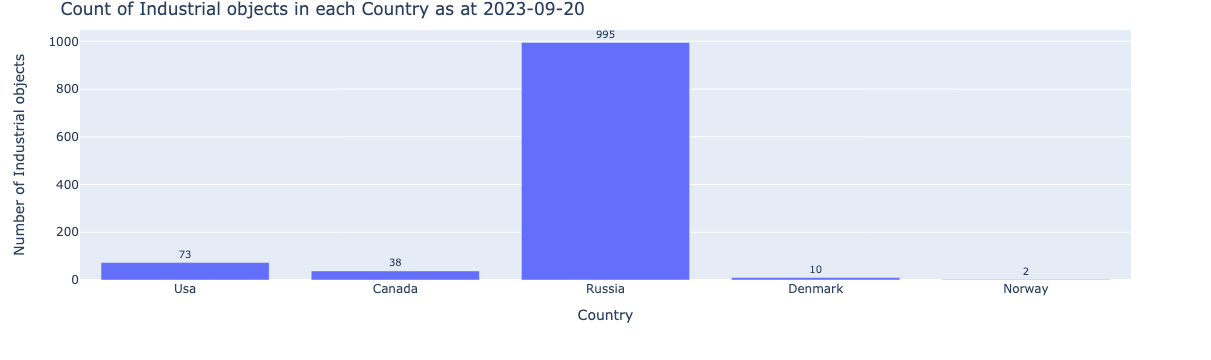

In [65]:
import requests
import geopandas as gpd
import json
import plotly.express as px

URL = 'https://api.ohsome.org/v1/elements/count/groupBy/boundary'

# Read the GeoJSON file containing the bounding polygon
with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    bounding_polygon_geojson = json.load(geojson_file)



# Define the request parameters and make the post request
data = {
"bpolys": json.dumps(bounding_polygon_geojson),  # Convert GeoJSON to JSON string
"time": "2023-09-20",
"filter": "industrial=*",
"format": "json"
 }

response = requests.post(URL, data=data)
results = response.json()
#print(results)

group_objects = [item['groupByObject'] for item in results['groupByResult']]
values = [item['result'][0]['value'] for item in results['groupByResult']]

# Create a bar chart using Plotly
fig = px.bar(x=group_objects, y=values, labels={'x': 'Group Object', 'y': 'Value'}, text=values)
fig.update_layout(
    title='Count of Industrial objects in each Country as at 2023-09-20',
    xaxis_title='Country',
    yaxis_title='Number of Industrial objects'
)

# Customize the text placement
fig.update_traces(texttemplate='%{text}',textfont=dict(size=10), textposition='outside')
fig.update_layout(margin=dict(t=30))
fig.show()

# `landuse=quarry`

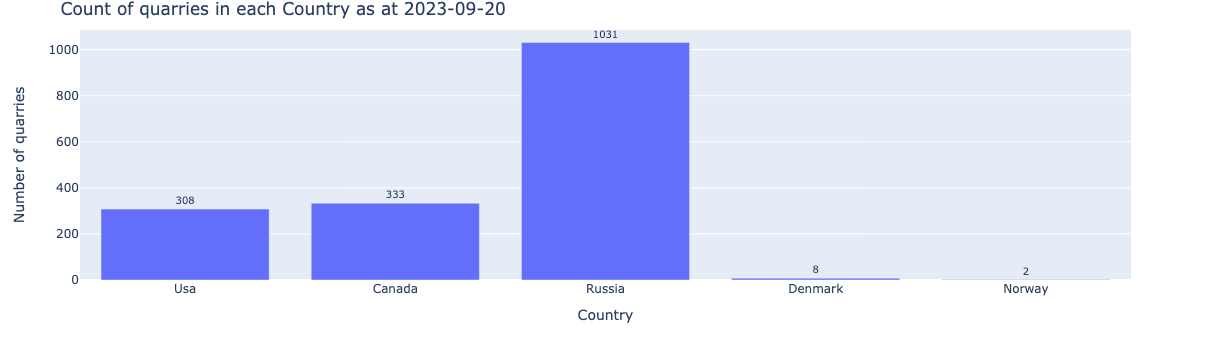

In [64]:
import requests
import geopandas as gpd
import json
import plotly.express as px

URL = 'https://api.ohsome.org/v1/elements/count/groupBy/boundary'

# Read the GeoJSON file containing the bounding polygon
with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    bounding_polygon_geojson = json.load(geojson_file)



# Define the request parameters and make the post request
data = {
"bpolys": json.dumps(bounding_polygon_geojson),  # Convert GeoJSON to JSON string
"time": "2023-09-20",
"filter": "landuse=quarry",
"format": "json"
 }

response = requests.post(URL, data=data)
results = response.json()
#print(results)
group_objects = [item['groupByObject'] for item in results['groupByResult']]
values = [item['result'][0]['value'] for item in results['groupByResult']]

# Create a bar chart using Plotly
fig = px.bar(x=group_objects, y=values, labels={'x': 'Group Object', 'y': 'Value'}, text=values)
fig.update_layout(
    title='Count of quarries in each Country as at 2023-09-20',
    xaxis_title='Country',
    yaxis_title='Number of quarries'
)

# Customize the text placement
fig.update_traces(texttemplate='%{text}',textfont=dict(size=10), textposition='outside')
fig.update_layout(margin=dict(t=30))
fig.show()

# `man_made=storage_tank`

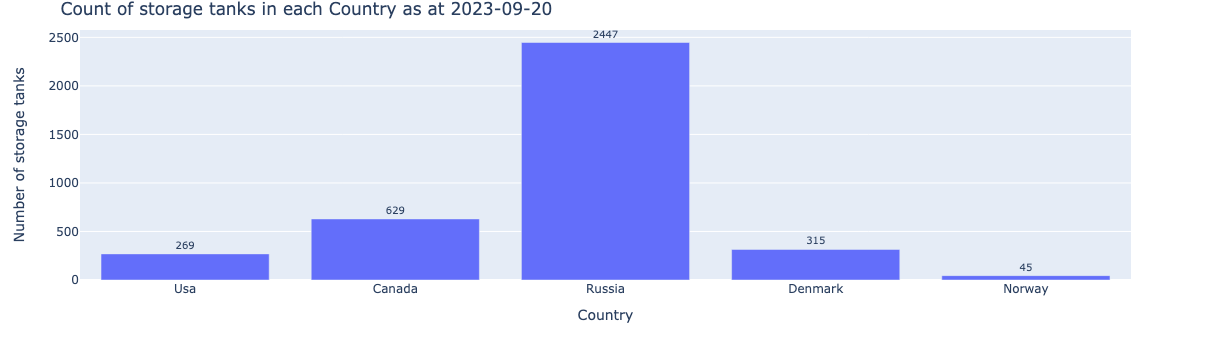

In [60]:
import requests
import geopandas as gpd
import json
import plotly.express as px

URL = 'https://api.ohsome.org/v1/elements/count/groupBy/boundary'

# Read the GeoJSON file containing the bounding polygon
with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    bounding_polygon_geojson = json.load(geojson_file)



# Define the request parameters and make the post request
data = {
"bpolys": json.dumps(bounding_polygon_geojson),  # Convert GeoJSON to JSON string
"time": "2023-09-20",
"filter": "man_made=storage_tank",
"format": "json"
 }

response = requests.post(URL, data=data)
results = response.json()
#print(results)
group_objects = [item['groupByObject'] for item in results['groupByResult']]
values = [item['result'][0]['value'] for item in results['groupByResult']]

# Create a bar chart using Plotly
fig = px.bar(x=group_objects, y=values, labels={'x': 'Group Object', 'y': 'Value'}, text=values)
fig.update_layout(
    title='Count of storage tanks in each Country as at 2023-09-20',
    xaxis_title='Country',
    yaxis_title='Number of storage tanks'
)

# Customize the text placement
fig.update_traces(texttemplate='%{text}',textfont=dict(size=10), textposition='outside')
fig.update_layout(margin=dict(t=30))
fig.show()

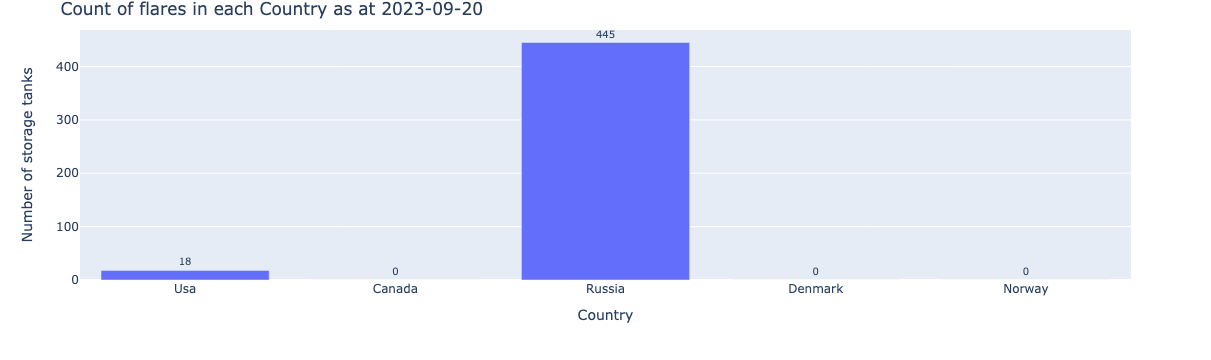

In [63]:
import requests
import geopandas as gpd
import json
import plotly.express as px

URL = 'https://api.ohsome.org/v1/elements/count/groupBy/boundary'

# Read the GeoJSON file containing the bounding polygon
with open('data/boundary_cont_discon.geojson', 'r') as geojson_file:
    bounding_polygon_geojson = json.load(geojson_file)



# Define the request parameters and make the post request
data = {
"bpolys": json.dumps(bounding_polygon_geojson),  # Convert GeoJSON to JSON string
"time": "2023-09-20",
"filter": "man_made=flare",
"format": "json"
 }

response = requests.post(URL, data=data)
results = response.json()
#print(results)
group_objects = [item['groupByObject'] for item in results['groupByResult']]
values = [item['result'][0]['value'] for item in results['groupByResult']]

# Create a bar chart using Plotly
fig = px.bar(x=group_objects, y=values, labels={'x': 'Group Object', 'y': 'Value'}, text=values)
fig.update_layout(
    title='Count of flares in each Country as at 2023-09-20',
    xaxis_title='Country',
    yaxis_title='Number of storage tanks'
)

# Customize the text placement
fig.update_traces(texttemplate='%{text}',textfont=dict(size=10), textposition='outside')
fig.update_layout(margin=dict(t=30))
fig.show()

## Plotting count of features by tag and country

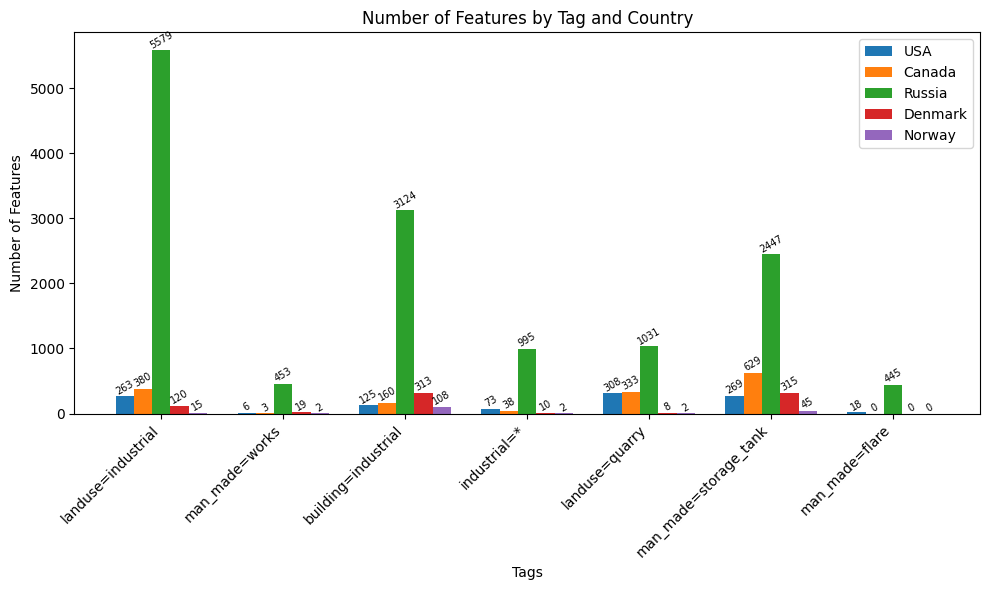

In [59]:
import matplotlib.pyplot as plt
import numpy as np


tags = ['landuse=industrial', 'man_made=works', 'building=industrial', 'industrial=*', 'landuse=quarry', 'man_made=storage_tank', 'man_made=flare']
countries = ['USA', 'Canada', 'Russia', 'Denmark', 'Norway']

data = {
    'USA': [263, 6, 125, 73, 308, 269, 18],
    'Canada': [380, 3, 160, 38, 333, 629, 0],
    'Russia': [5579, 453, 3124, 995, 1031, 2447, 445],
    'Denmark': [120, 19, 313, 10, 8, 315, 0],
    'Norway': [15, 2, 108, 2, 2, 45, 0]
}

# Plotting
bar_width = 0.15
index = np.arange(len(tags))

fig, ax = plt.subplots(figsize=(10, 6))

for i, country in enumerate(countries):
    ax.bar(index + i * bar_width, data[country], bar_width, label=country)

ax.set_xlabel('Tags')
ax.set_ylabel('Number of Features')
ax.set_title('Number of Features by Tag and Country')
ax.set_xticks(index + bar_width * (len(countries) - 1) / 2)
ax.set_xticklabels(tags, rotation=45, ha='right')
ax.legend()
for i, bar in enumerate(ax.patches):
    # Get the height of the bar
    height = bar.get_height()
    
    # Add the value label inside the bar
    ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', fontsize=7, rotation=30)


plt.tight_layout()
plt.show()

# Using Ohsome quality API (OQAPI)  for Intrinsic Completenesss(Mapping Saturation) and Currentness estimation indicators.


The Completeness indicator computes the saturation of mapping activity within the last 3 years. The currentness indicator computes the percentage of objects within a map feature that has received updates within the last 3 years. To compute these indicators an area of interest (`bpolys`) and aggreated OSM  features(`topic`) are required. For this part of the code to work you need to set up a local instance of OQAPI

## Setting up a local instance of OQAPI
### Requirement
 Docker Compose
### Steps
- Clone Ohsome Quality API from [github](https://github.com/GIScience/ohsome-quality-api.git)
- replace the `preset.yaml` in the `topics` folder (ohsome-quality-api/ohsome_quality_api/topics/presets.yaml) with the one provided in the working directory 
- cd into ohsome-quality-api folder
- run `docker compose up --detach` in your terminal


 

Alternatively if you have 

- Python: $\geq$ 3.10
- Poetry: $\geq$ 1.5
- R: $\geq$ 4.0
  
    - Clone Ohsome Quality API from [github](https://github.com/GIScience/ohsome-quality-api.git)
    - replace the `preset.yaml` in the `topics` folder (ohsome-quality-api/ohsome_quality_api/topics/presets.yaml) with the one provided in the working directory 
    - cd into ohsome-quality-api folder
    - run `python scripts/start_api.py`


Default host is 127.0.0.1 and port is 8080. To verify installation go to the Swagger interface for [OQAPI](http://127.0.0.1:8080/docs) to explore the available endpoints



In [27]:
import json
import os
import requests
import geopandas as gpd
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


base_url = "http://127.0.0.1:8080"
endpoint = "/indicators"

# the plot_mapping_saturation function takes a feature and a dir as input to return the plot of the mapping saturation of the feature and the saturation(completeness information) 

def plot_mapping_saturation(feature, save_dir="plots"):
    # Extract feature ID
    feature_id = feature.get("properties", {}).get("id", "unknown_id")
    url = base_url + endpoint + "/mapping-saturation"
    headers = {"accept": "application/json"}
    
    # Create a GeoJSON FeatureCollection with the feature
    bpolys = {
        "type": "FeatureCollection",
        "features": [feature]
    }

    parameters = {"topic": "industrial-sites-count", "bpolys": bpolys} #set parameters. 

    # Send the request

    response = requests.post(url, headers=headers, json=parameters)
    response.raise_for_status()
    result = response.json()["result"][0]["result"]

    # Extract completeness value
    completeness_value = "{:.2%}".format(result['value'])

    custom_title = f"{result['figure']['layout']['title']['text']}<br>The Saturation of the last 3 years is {completeness_value}<br>{feature_id}"

    # Parse plotly figure
    figure = go.Figure(result["figure"])
    
    # Modify the layout to include the custom title
    figure.update_layout(
        title_text=custom_title,
        title_x=0.5,  # Center the title within the layout
    )
    
    # Save the figure as an image (PNG format)
    save_path = os.path.join(save_dir, f"Completeness_plot_{feature_id}.png")
    pio.write_image(figure, save_path)

    # Return a dictionary with feature ID and completeness value
    return {"Country": feature_id, "Completeness": completeness_value}

# Generate mapping saturation(completeness) information for each country within the study region
study_area = "data/boundary_cont_discon.geojson"
save_directory = "plots"

with open(study_area, "r") as file:
    data = json.load(file)

# Collect completeness information for each feature
completeness_info_list = []

for feature in data["features"]:
    completeness_info = plot_mapping_saturation(feature, save_dir=save_directory)
    if completeness_info:
        completeness_info_list.append(completeness_info)

# Create a GeoDataFrame from the collected information
completeness_df = pd.DataFrame(completeness_info_list)


completeness_df.head()


,Country,Completeness
0,Usa,83.95%
1,Canada,82.60%
2,Russia,68.73%
3,Denmark,99.87%
4,Norway,97.71%


`Currentness indicator`

In [28]:
import json
import os
import requests
import geopandas as gpd
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


base_url = "http://127.0.0.1:8080"
endpoint = "/indicators"

# the plot_currentness function takes a feature and a folder as input to return the plot of the currentness of the feature and the saturation(completeness information) 

def plot_currentness(feature, save_dir="plots"):
     # Extract feature ID
    feature_id = feature.get("properties", {}).get("id", "unknown_id")

    url = base_url + endpoint + "/currentness"

    headers = {"accept": "application/json"}
    
    # Create a GeoJSON FeatureCollection with a single feature
    bpolys = {
        "type": "FeatureCollection",
        "features": [feature]
    }

    parameters = {"topic": "industrial-sites-count", "bpolys": bpolys}

    # Send the request
    
    response = requests.post(url, headers=headers, json=parameters)
    response.raise_for_status() #Raise an Exception if HTTP Status Code is not 200
    result = response.json()["result"][0]["result"]

    # Extract currentness value
    currentness_value = "{:.2%}".format(result['value'])
    
    # Create a custom title that includes the title and description
    custom_title = f"{result['figure']['layout']['title']['text']}<br>The Currentness is {currentness_value}<br>{feature_id}"
    # parse plotly figure
    figure = go.Figure(result["figure"])
    
    # Modify the layout to include the custom title
    figure.update_layout(
        title_text=custom_title,
        title_x=0.5,  # Center the title within the layout
    )
    
    # Save the figure as an image (PNG format)
    save_path = os.path.join(save_dir, f"Currentness_plot_{feature_id}.png")
    pio.write_image(figure, save_path)

    # Return a dictionary with feature ID and currentness value
    return {"Country": feature_id, "Currentness": currentness_value}

# Generate currentness information for each country within the study region
study_area = "data/boundary_cont_discon.geojson"
save_directory = "plots"

with open(study_area, "r") as file:
    data = json.load(file)

# Collect currentness information for each feature
currentness_info_list = []

for feature in data["features"]:
    currentness_info = plot_currentness(feature, save_dir=save_directory)
    if currentness_info:
        currentness_info_list.append(currentness_info)

# Create a GeoDataFrame from the collected information
currentness_df = pd.DataFrame(currentness_info_list)
currentness_df.head()

,Country,Currentness
0,Usa,33.04%
1,Canada,30.92%
2,Russia,31.91%
3,Denmark,48.63%
4,Norway,33.73%


# Plot of the Quality Indicator Estimates

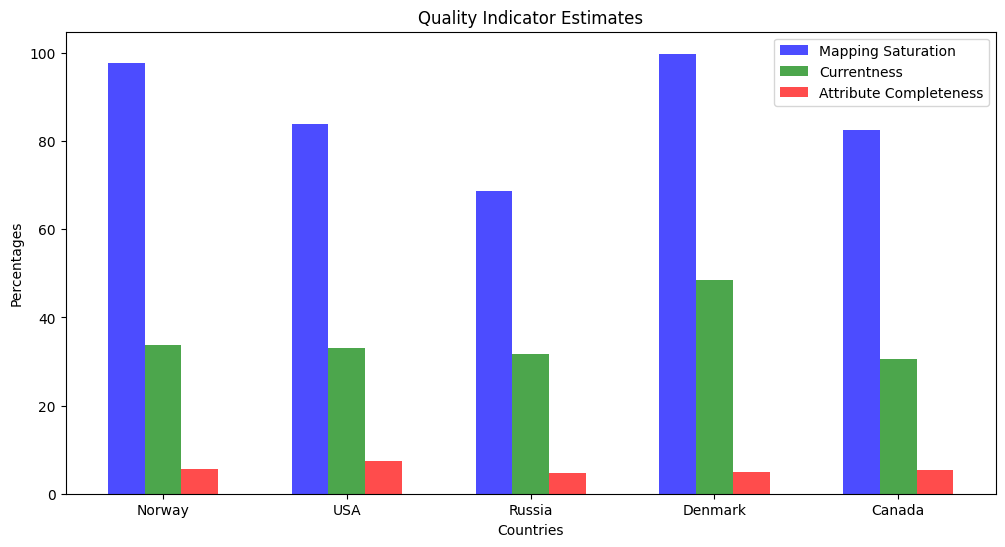

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Data
countries = ['Norway', 'USA', 'Russia', 'Denmark', 'Canada']
mapping_saturation = [97.71, 83.95, 68.73, 99.87, 82.6]
currentness = [33.7, 33.1, 31.7, 48.5, 30.5]
attribute_completeness = [5.69, 7.33, 4.66, 4.95, 5.49]



fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plots for percentages
bar_width = 0.2
bar_positions = np.arange(len(countries))

ax1.bar(bar_positions - bar_width, mapping_saturation, width=bar_width, label='Mapping Saturation', color='b', alpha=0.7)
ax1.bar(bar_positions, currentness, width=bar_width, label='Currentness', color='g', alpha=0.7)
ax1.bar(bar_positions + bar_width, attribute_completeness, width=bar_width, label='Attribute Completeness', color='r', alpha=0.7)

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(countries)
ax1.set_xlabel('Countries')
ax1.set_ylabel('Percentages')
ax1.legend(loc='best', bbox_to_anchor=(1, 1))



# Show the plot
plt.title('Quality Indicator Estimates')
plt.savefig('plots/country_statistics_plot.png', bbox_inches='tight')
plt.show()


# Visualizing the Saturation and Currentness Indicator Estimations

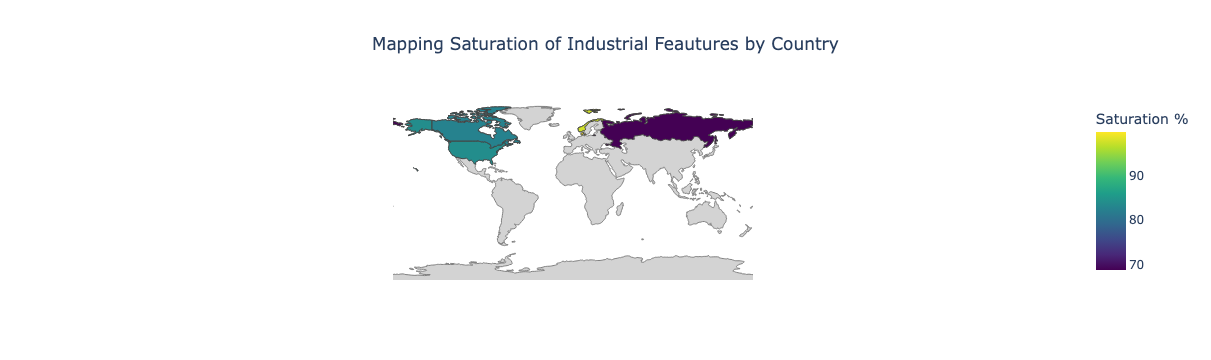

In [51]:
import plotly.express as px

# Saturation data 
data = [
    {"Country": "Usa", "Saturation": 83.95},
    {"Country": "Russia", "Saturation": 68.73},
    {"Country": "Canada", "Saturation": 82.6},
    {"Country": "Norway", "Saturation": 97.71},
    {"Country": "Denmark", "Saturation": 99.87},
    # Add more countries and saturation data here
]

# Create a choropleth map
fig = px.choropleth(
    data_frame=data,
    locations="Country",  # Column with country names or identifiers
    locationmode="country names",  # Use country names as identifiers
    color="Saturation",  # Column with saturation percentages
    color_continuous_scale="Viridis",  # Choose a color scale
    title="Mapping Saturation of Industrial Feautures by Country",
)
# Customize the map and add a legend
fig.update_geos(
    visible=False,  # Hide the default world map outline
    showcoastlines=True,  # Show coastlines
    coastlinecolor="Gray",  # Set coastlines color
)

fig.update_layout(
    geo=dict(
        scope="world",  # Set the map scope to "world"
        showland=True,  # Show land mass
        landcolor="LightGray",  # Set land color
    ),
    coloraxis_colorbar=dict(
        title="Saturation %",  # Set the colorbar title
        xanchor="left",  # Adjust the position of the colorbar
    ),
)
fig.update_layout(title_x=0.5)
fig.show()







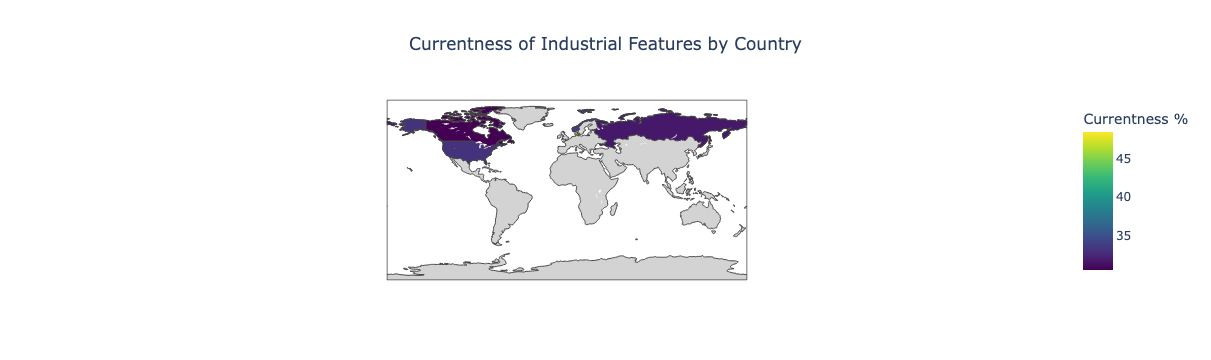

In [52]:
import plotly.express as px

# Sample data (replace with your actual data)
data = [
    {"Country": "Usa", "Currentness": 33.1},
    {"Country": "Russia", "Currentness": 31.7},
    {"Country": "Canada", "Currentness": 30.5},
    {"Country": "Denmark", "Currentness": 48.5},
    {"Country": "Norway", "Currentness": 33.7},
    # Add more countries and saturation data here
]

# Create a choropleth map
fig = px.choropleth(
    data_frame=data,
    locations="Country",  # Column with country names or identifiers
    locationmode="country names",  # Use country names as identifiers
    color="Currentness",  # Column with saturation percentages
    color_continuous_scale="Viridis",  # Choose a color scale
    title="Currentness of Industrial Features by Country",
)
# Customize the map and add a legend
fig.update_geos(
    center=dict(lon=0, lat=360),
    visible=True,  # Hide the default world map outline
)

fig.update_layout(
    geo=dict(
        scope="world",  # Set the map scope to "world"
        showland=True,  # Show land mass
        landcolor="LightGray",  # Set land color
    ),
    coloraxis_colorbar=dict(
        title="Currentness %",  # Set the colorbar title
        xanchor="left",  # Adjust the position of the colorbar
    ),
)
fig.update_layout(title_x=0.5)
fig.show()



## Downloading elements with Ohsome API 
 The `elements` extraction endpoint was used for extracting osm elements. Parameters for the call were the boundaries of the area of interest(bpolys), "time": "2023-09-20", "filter": "landuse=quarry and type:way", "showMetadata": "yes", "properties": "metadata,tags", "clipGeometry": "false"filter(tag of interest), clipGeometry:"false" 

In [66]:
import requests
import json
import os

# function to generate output filename for the API response
def generate_output_filepath(input_filepath, filter):
    # Extract the country name from the input file path (assuming it ends with '.geojson')
    country_name = os.path.splitext(os.path.basename(input_filepath))[0]

    # Replace '=' with '_' in the filter
    sanitized_filter = filter.replace('=', '_')

    # Generate the output file path
    output_filepath = f"results/{country_name}_{sanitized_filter}.geojson"
    return output_filepath

filter = "landuse=quarry" # specify the tag for the elements you want to download
input_filepath = 'data/canada.geojson'  # path to the area of interest (GeoJSON format)

# Read the GeoJSON file containing the boundary
with open(input_filepath, 'r') as geojson_file:
    geojson_data = json.load(geojson_file)

# Define the URL and query parameters for the ohsome API call
URL = 'https://api.ohsome.org/v1/elements/geometry'
data = {
    "bpolys": json.dumps(geojson_data),
    "time": "2023-09-20",
    "filter": filter,
    "showMetadata": "yes",
    "properties": "metadata,tags",
    "clipGeometry": "false"
}
response = requests.post(URL, data=data)
geojson_response = response.json()

# Generate the output file path dynamically
output_filepath = generate_output_filepath(input_filepath, filter)

# Write the JSON data to the new GeoJSON file
with open(output_filepath, "w") as geojson_file:
    json.dump(geojson_response, geojson_file, indent=2)

print(f"GeoJSON data has been saved to {output_filepath}")


GeoJSON data has been saved to results/canada_landuse_quarry.geojson


## Exploring the attributes of the various features.

Worldcloud for each column and the frequency of the values can be generated 

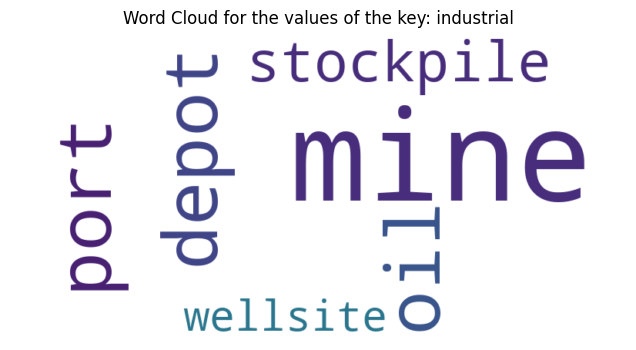

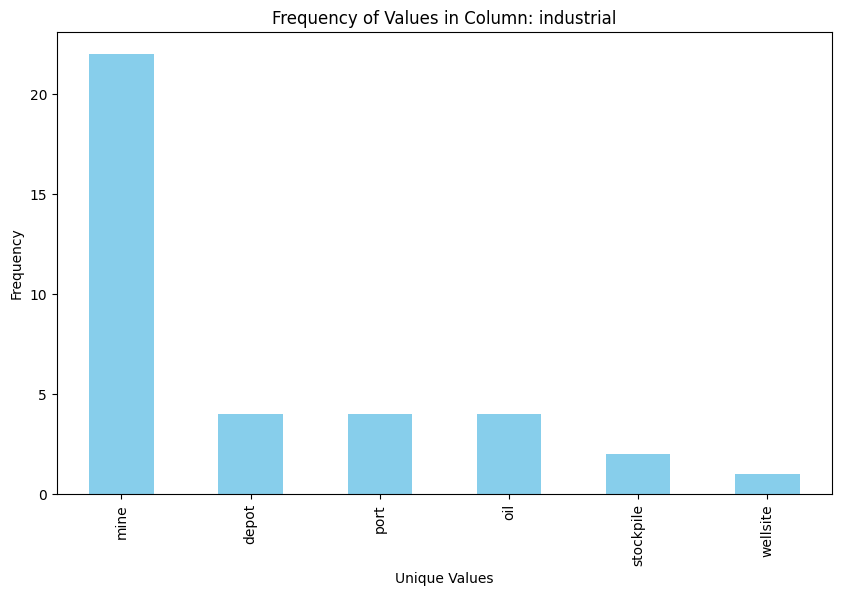

In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# the word_cloud_plot_without_nulls function takes a gdf of features and column(field name to generate a wordcloud for the vallues present in that column

def word_cloud_plot_without_nulls(gdf, column_name):
    # Drop rows with null or NaN values in the specified column
    gdf = gdf.dropna(subset=[column_name])

    # Extract the specified column from the GeoDataFrame
    column_data = gdf[column_name]

    # Combine all the values in the column into a single string
    text = ' '.join(column_data.astype(str))

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Create a Matplotlib figure
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for the values of the key: {column_name}')
    
    # Save the plot with the column name and "wordcloud" appended
    output_filename = f'{column_name}_wordcloud.png'
    plt.savefig(output_filename, bbox_inches='tight')

# the plot_column_frequency takes a gdf and column(field) name as an input to creat a barplot for the frequencies of values present in the field of interest

def plot_column_frequency(gdf, column_name):
    # Count the frequency of each unique value in the specified column
    value_counts = gdf[column_name].value_counts()

    # Create a bar plot for the value frequencies
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of Values in Column: {column_name}')
    plt.xlabel('Unique Values')
    plt.ylabel('Frequency')
    plt.yscale('linear')
    plt.xticks(rotation=90)
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    plt.savefig(f'{column_name}_frequency.png', bbox_inches='tight')
    plt.show()

#Generating a wordcloud and bar plot for the values of the field industrial in the landuse polygon features of Canada

russia_gdf = gpd.read_file('results/canada_industrial_landuse.geojson') #read the feature of interest into a geodataframe

word_cloud_plot_without_nulls(russia_gdf, "industrial")
plot_column_frequency(russia_gdf, "industrial")

# Calculating the Attribute completeness of features of interest

In [72]:
## import geopandas as gpd

gdf = gpd.read_file('results/norway_industrial_landuse.geojson')


gdf['plant:source'].value_counts()
# Calculate the percentage of completion for each column
completion_percentages = (gdf['plant:source'].count() / len(gdf)) * 100
count = gdf['plant:source'].count()
# Display the completion percentages
print(f' {completion_percentages} and {count} and {len(gdf)}')
gdf['plant:source'].value_counts()

 13.333333333333334 and 2 and 15


plant:source
coal    2
Name: count, dtype: int64